In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
from matplotlib_venn import venn2

## Read BGI input

## BGI

In [14]:
# read in the fastQC results
bgi1 = pd.read_csv('input/Combined_bgi_results.txt', sep='\t')
bgi1['Filename'] = bgi1['Filename'].str.replace('_2.fq.gz', '')

# read in the names match file
bgiM = pd.read_csv('input/BGI_names_match.csv', sep=';', header=None)
bgiM.columns = ['smpl_line', 'smpl_name']
bgiM['smpl_line'] = bgiM['smpl_line'].str.replace('_1_fastqc', '')

# map the names
bgi1['Filename'] = bgi1['Filename'].map(bgiM.set_index('smpl_line')['smpl_name'])

bgi1.tail()

/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_41028/809399933.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  bgi1['Filename'] = bgi1['Filename'].str.replace('_2.fq.gz', '')


,Filename,Platform,Total Sequences,Sequences flagged as poor quality,Sequence length,%GC,Per base sequence quality,Sequence Duplication Levels,Total Deduplicated Percentage,Overrepresented sequences,Adapter Content
1906,V68KXR,BGI,113451507,0,150,47,pass,warn,66.0,pass,pass
1907,V23IHW,BGI,45434238,0,150,47,pass,pass,84.0,pass,pass
1908,V9DHHW,BGI,49116526,0,150,46,pass,pass,85.0,pass,pass
1909,VW6TX4,BGI,35633971,0,150,44,pass,pass,89.0,pass,pass
1910,V44S08,BGI,72588169,0,150,45,pass,warn,67.0,pass,pass


In [15]:
bgi2 = pd.read_csv('input/Combined_add_bgi_results.txt', sep='\t')
bgi2['Filename'] = bgi2['Filename'].str.replace('bgi_', '')
bgi2['Filename'] = bgi2['Filename'].str.replace('_nohost.fq1.gz', '')

bgi = pd.concat([bgi1, bgi2], axis=0)
bgi = bgi.drop_duplicates(subset='Filename', keep='first').reset_index(drop=True)
bgi.tail()

/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_41028/795543264.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  bgi2['Filename'] = bgi2['Filename'].str.replace('_nohost.fq1.gz', '')


,Filename,Platform,Total Sequences,Sequences flagged as poor quality,Sequence length,%GC,Per base sequence quality,Sequence Duplication Levels,Total Deduplicated Percentage,Overrepresented sequences,Adapter Content
2047,VA6KWA,BGI,14263705,0,150,46,pass,pass,94.0,pass,pass
2048,VM11NF,BGI,13404053,0,150,46,pass,pass,85.0,pass,pass
2049,VXSG83,BGI,15291805,0,150,45,pass,pass,94.0,pass,pass
2050,VQ9DGJ,BGI,16072275,0,150,46,pass,pass,93.0,pass,pass
2051,V4NQIN,BGI,15929089,0,150,48,pass,pass,95.0,pass,pass


In [16]:
print('bgi1:', bgi1.shape)
print('bgi2:', bgi2.shape)
print('bgi:', bgi.shape)

bgi1: (1911, 11)
bgi2: (141, 11)
bgi: (2052, 11)


In [17]:
l1990 = pd.read_csv('../step3_motus/input/Cross-Platform_smpls_list_1990_sorted.csv', header=None)
l1990.columns = ['sample_name']
len(l1990)

1990

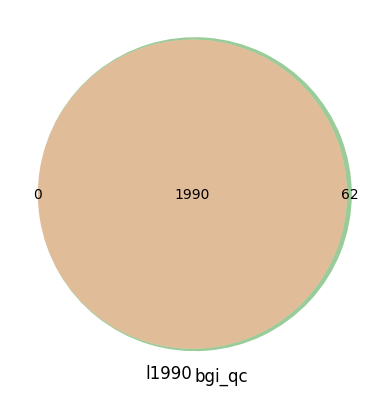

In [18]:
venn2([set(l1990['sample_name']), set(bgi['Filename'])], ('l1990', 'bgi_qc'))
qc_abs = set(l1990['sample_name']).difference(set(bgi['Filename']))
len(qc_abs)

pd.DataFrame(list(qc_abs)).to_csv('results/qc_abs.csv', index=False, header=False)


In [21]:
bgi = bgi.merge(l1990, left_on='Filename', right_on='sample_name', how='inner')

In [23]:
bgi.to_csv('results/BGI_fastqc_1990.csv', index=False)

In [22]:
bgi

,Filename,Platform,Total Sequences,Sequences flagged as poor quality,Sequence length,%GC,Per base sequence quality,Sequence Duplication Levels,Total Deduplicated Percentage,Overrepresented sequences,Adapter Content,sample_name
0,VM6FOP,BGI,59182644,0,150,49,pass,pass,82.0,pass,pass,VM6FOP
1,VZIO94,BGI,47703090,0,150,45,pass,warn,69.0,pass,pass,VZIO94
2,VP8AMJ,BGI,81020484,0,150,45,pass,warn,53.0,pass,pass,VP8AMJ
3,V3ZZZH,BGI,36955413,0,150,43,pass,pass,83.0,pass,pass,V3ZZZH
4,V9WA5N,BGI,37442042,0,150,45,pass,pass,89.0,pass,pass,V9WA5N
...,...,...,...,...,...,...,...,...,...,...,...,...
1985,VA6KWA,BGI,14263705,0,150,46,pass,pass,94.0,pass,pass,VA6KWA
1986,VM11NF,BGI,13404053,0,150,46,pass,pass,85.0,pass,pass,VM11NF
1987,VXSG83,BGI,15291805,0,150,45,pass,pass,94.0,pass,pass,VXSG83
1988,VQ9DGJ,BGI,16072275,0,150,46,pass,pass,93.0,pass,pass,VQ9DGJ


## Illumina

In [24]:
ill = pd.read_csv('input/Combined_illumina_results.txt', sep='\t')
ill['Filename'] = ill['Filename'].str.replace('_2.fq.gz', '')
ill.tail()

/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_41028/1287457690.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ill['Filename'] = ill['Filename'].str.replace('_2.fq.gz', '')


,Filename,Platform,Total Sequences,Sequences flagged as poor quality,Sequence length,%GC,Per base sequence quality,Sequence Duplication Levels,Total Deduplicated Percentage,Overrepresented sequences,Adapter Content
1989,VE0WMY,Illumina,14759347,0,150,45,pass,pass,80.0,pass,pass
1990,VGCQOM,Illumina,17140513,0,150,42,pass,warn,65.0,pass,pass
1991,VWZEWE,Illumina,13462755,0,150,44,pass,warn,66.0,pass,pass
1992,V5IRLB,Illumina,15160644,0,150,48,pass,pass,81.0,pass,pass
1993,V0BVU1,Illumina,17351316,0,150,44,pass,pass,81.0,pass,pass


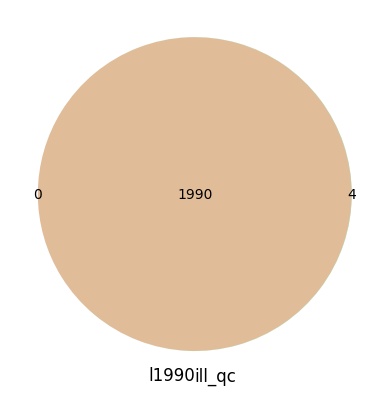

In [12]:
venn2([set(l1990['sample_name']), set(ill['Filename'])], ('l1990', 'ill_qc'))
qc_abs = set(l1990['sample_name']).difference(set(ill['Filename']))
len(qc_abs)

pd.DataFrame(list(qc_abs)).to_csv('results/samples_qc_abs_ill.csv', index=False, header=False)

In [25]:
ill = ill.merge(l1990, left_on='Filename', right_on='sample_name', how='inner')
ill.tail()

,Filename,Platform,Total Sequences,Sequences flagged as poor quality,Sequence length,%GC,Per base sequence quality,Sequence Duplication Levels,Total Deduplicated Percentage,Overrepresented sequences,Adapter Content,sample_name
1985,VE0WMY,Illumina,14759347,0,150,45,pass,pass,80.0,pass,pass,VE0WMY
1986,VGCQOM,Illumina,17140513,0,150,42,pass,warn,65.0,pass,pass,VGCQOM
1987,VWZEWE,Illumina,13462755,0,150,44,pass,warn,66.0,pass,pass,VWZEWE
1988,V5IRLB,Illumina,15160644,0,150,48,pass,pass,81.0,pass,pass,V5IRLB
1989,V0BVU1,Illumina,17351316,0,150,44,pass,pass,81.0,pass,pass,V0BVU1


In [26]:
ill.to_csv('results/Illumina_fastqc_1990.csv', index=False)

## Read Illumina input

In [3]:
ill = pd.read_csv('input/Combined_illumina_results.txt', sep='\t')
ill['Filename'] = ill['Filename'].str.replace('_2.fq.gz', '')
ill.tail()

/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_82404/1287457690.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ill['Filename'] = ill['Filename'].str.replace('_2.fq.gz', '')


,Filename,Platform,Total Sequences,Sequences flagged as poor quality,Sequence length,%GC,Per base sequence quality,Sequence Duplication Levels,Total Deduplicated Percentage,Overrepresented sequences,Adapter Content
1989,VE0WMY,Illumina,14759347,0,150,45,pass,pass,80.0,pass,pass
1990,VGCQOM,Illumina,17140513,0,150,42,pass,warn,65.0,pass,pass
1991,VWZEWE,Illumina,13462755,0,150,44,pass,warn,66.0,pass,pass
1992,V5IRLB,Illumina,15160644,0,150,48,pass,pass,81.0,pass,pass
1993,V0BVU1,Illumina,17351316,0,150,44,pass,pass,81.0,pass,pass


In [4]:
mrg = pd.merge(bgi, ill, on='Filename', how='inner', suffixes=('_bgi', '_ill'))
mrg.to_excel('results/Combined_fastQC_results.xlsx', index=False)
mrg.tail()

,Filename,Platform_bgi,Total Sequences_bgi,Sequences flagged as poor quality_bgi,Sequence length_bgi,%GC_bgi,Per base sequence quality_bgi,Sequence Duplication Levels_bgi,Total Deduplicated Percentage_bgi,Overrepresented sequences_bgi,...,Platform_ill,Total Sequences_ill,Sequences flagged as poor quality_ill,Sequence length_ill,%GC_ill,Per base sequence quality_ill,Sequence Duplication Levels_ill,Total Deduplicated Percentage_ill,Overrepresented sequences_ill,Adapter Content_ill
1847,V68KXR,BGI,113451507,0,150,47,pass,warn,66.0,pass,...,Illumina,15923350,0,150,46,pass,pass,80.0,pass,pass
1848,V23IHW,BGI,45434238,0,150,47,pass,pass,84.0,pass,...,Illumina,14776034,0,150,46,pass,pass,82.0,pass,pass
1849,V9DHHW,BGI,49116526,0,150,46,pass,pass,85.0,pass,...,Illumina,15227398,0,150,46,pass,pass,81.0,pass,pass
1850,VW6TX4,BGI,35633971,0,150,44,pass,pass,89.0,pass,...,Illumina,15151679,0,150,45,pass,pass,85.0,pass,pass
1851,V44S08,BGI,72588169,0,150,45,pass,warn,67.0,pass,...,Illumina,16227242,0,150,45,pass,pass,78.0,pass,pass


## RAD

In [28]:
mrg = pd.merge(bgi, ill, on='Filename', how='outer', suffixes=('_bgi', '_ill'))

In [29]:
print('Total number of overlaping samples: ' + str(len(mrg)))

Total number of overlaping samples: 1990


### Main parameters to compare:
- Total Sequences
- Sequences flagged as poor quality
- Sequence length_bgi
- %GC
- Per base sequence quality
- Sequence Duplication Levels
- Total Deduplicated Percentage
- Overrepresented sequences
- Adapter Content

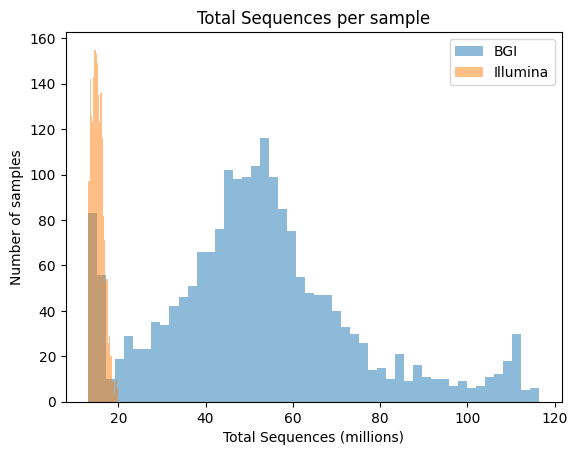

In [30]:
# Total Sequences

plt.hist(mrg['Total Sequences_bgi']/1000000, bins=50, alpha=0.5, label='BGI')
plt.hist(mrg['Total Sequences_ill']/1000000, bins=25, alpha=0.5, label='Illumina')
plt.legend(loc='upper right')
plt.xlabel('Total Sequences (millions)')
plt.ylabel('Number of samples')
plt.title('Total Sequences per sample')
plt.savefig('results/Total_Sequences.png', dpi=300)

In [31]:
# Sequences flagged as poor quality

print('\033[1m BGI. Sequences flagged as poor quality \033[0m')
print(mrg['Sequences flagged as poor quality_bgi'].value_counts(), '\n')

print('\033[1m Illumina. Sequences flagged as poor quality \033[0m')
print(mrg['Sequences flagged as poor quality_ill'].value_counts(), '\n')

 BGI. Sequences flagged as poor quality 
0    1990
Name: Sequences flagged as poor quality_bgi, dtype: int64 

 Illumina. Sequences flagged as poor quality 
0    1990
Name: Sequences flagged as poor quality_ill, dtype: int64 



In [32]:
#Sequence length

print('\033[1m BGI. Sequence length \033[0m')
print(mrg['Sequence length_bgi'].value_counts(), '\n')

print('\033[1m Illumina. Sequence length \033[0m')
print(mrg['Sequence length_ill'].value_counts(), '\n')

 BGI. Sequence length 
150    1990
Name: Sequence length_bgi, dtype: int64 

 Illumina. Sequence length 
150    1990
Name: Sequence length_ill, dtype: int64 



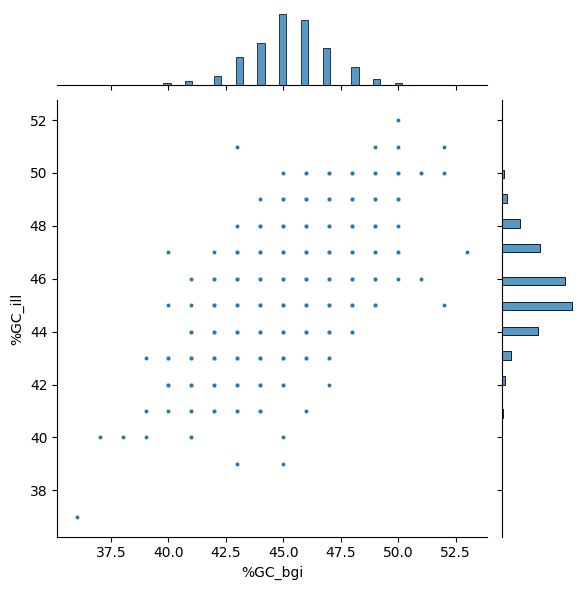

In [33]:
# %GC content
sns.jointplot(data=mrg, x="%GC_bgi", y="%GC_ill", s=9,palette='Set1')

In [34]:
# Per base sequence quality

print('\033[1m BGI. Per base sequence quality \033[0m')
print(mrg['Per base sequence quality_bgi'].value_counts(), '\n')

print('\033[1m Illumina. Per base sequence quality \033[0m')
print(mrg['Per base sequence quality_ill'].value_counts(), '\n')

 BGI. Per base sequence quality 
pass    1990
Name: Per base sequence quality_bgi, dtype: int64 

 Illumina. Per base sequence quality 
pass    1990
Name: Per base sequence quality_ill, dtype: int64 



 BGI. Sequence Duplication Levels 
pass    1673
warn     295
fail      22
Name: Sequence Duplication Levels_bgi, dtype: int64 

 Illumina. Sequence Duplication Levels 
pass    1821
warn     168
fail       1
Name: Sequence Duplication Levels_ill, dtype: int64 



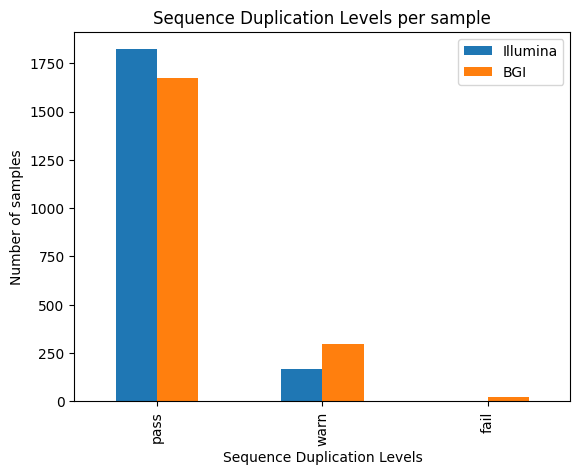

In [35]:
# Sequence Duplication Levels

print('\033[1m BGI. Sequence Duplication Levels \033[0m')
print(mrg['Sequence Duplication Levels_bgi'].value_counts(), '\n')

print('\033[1m Illumina. Sequence Duplication Levels \033[0m')
print(mrg['Sequence Duplication Levels_ill'].value_counts(), '\n')

#sns.jointplot(data=mrg, x="Sequence Duplication Levels_bgi", y="Sequence Duplication Levels_ill", s=9,palette='Set1')
bvc = mrg['Sequence Duplication Levels_ill'].value_counts()
ivc = mrg['Sequence Duplication Levels_bgi'].value_counts()
vc = pd.concat([bvc, ivc], axis=1)
vc.columns = ['Illumina', 'BGI']
# plot vc as a bar plot
vc.plot(kind='bar')
plt.xlabel('Sequence Duplication Levels')
plt.ylabel('Number of samples')
plt.title('Sequence Duplication Levels per sample')

plt.savefig('results/Sequence_Duplication_Levels.png', dpi=300, bbox_inches='tight')


In [21]:
mrg[mrg['Sequence Duplication Levels_bgi'] == 'warn']['Filename'].to_csv('results/Sequence_Duplication_Levels_warn_bgi.txt', index=False)
mrg[mrg['Sequence Duplication Levels_ill'] == 'warn']['Filename'].to_csv('results/Sequence_Duplication_Levels_warn_ill.txt', index=False)
mrg[mrg['Sequence Duplication Levels_bgi'] == 'fail']['Filename'].to_csv('results/Sequence_Duplication_Levels_fail_bgi.txt', index=False)
mrg[mrg['Sequence Duplication Levels_ill'] == 'fail']['Filename'].to_csv('results/Sequence_Duplication_Levels_fail_ill.txt', index=False)

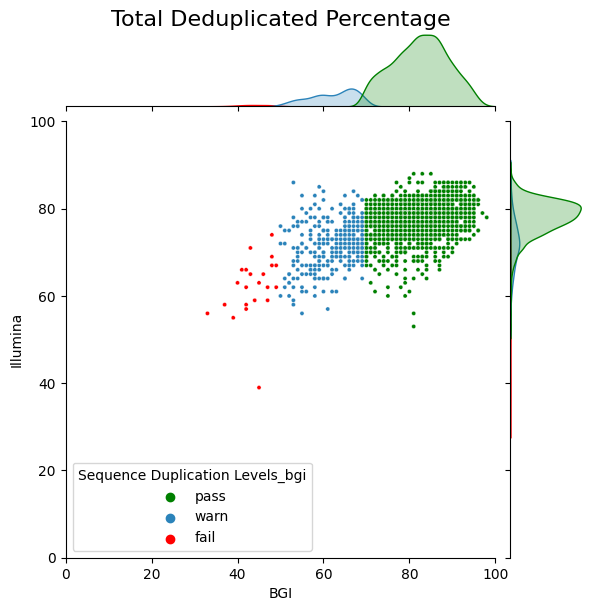

In [36]:
# Total Deduplicated Percentage

sns.jointplot(data=mrg, x="Total Deduplicated Percentage_bgi", y="Total Deduplicated Percentage_ill",hue='Sequence Duplication Levels_bgi', s=9, palette={
    'pass': 'green',
    'warn': '#2b83ba',
    'fail': 'red',
})

plt.title('Total Deduplicated Percentage', y=1.2, fontsize = 16)
plt.xlim(0,100)
plt.ylim(0,100)
plt.xlabel('BGI')
plt.ylabel('Illumina')

plt.savefig('results/Total_Deduplicated_Percentage.png', dpi=300)

In [37]:
# Overrepresented sequences
print('\033[1m BGI. Overrepresented sequences \033[0m')
print(mrg['Overrepresented sequences_bgi'].value_counts(), '\n')

print('\033[1m Illumina. Overrepresented sequences \033[0m')
print(mrg['Overrepresented sequences_ill'].value_counts(), '\n')

 BGI. Overrepresented sequences 
pass    1989
warn       1
Name: Overrepresented sequences_bgi, dtype: int64 

 Illumina. Overrepresented sequences 
pass    1989
warn       1
Name: Overrepresented sequences_ill, dtype: int64 



In [39]:
print('\033[1m BGI. Overrepresented sequences \033[0m')
mrg[mrg['Overrepresented sequences_bgi'] == 'warn']

 BGI. Overrepresented sequences 


,Filename,Platform_bgi,Total Sequences_bgi,Sequences flagged as poor quality_bgi,Sequence length_bgi,%GC_bgi,Per base sequence quality_bgi,Sequence Duplication Levels_bgi,Total Deduplicated Percentage_bgi,Overrepresented sequences_bgi,...,Total Sequences_ill,Sequences flagged as poor quality_ill,Sequence length_ill,%GC_ill,Per base sequence quality_ill,Sequence Duplication Levels_ill,Total Deduplicated Percentage_ill,Overrepresented sequences_ill,Adapter Content_ill,sample_name_ill
288,VSTACS,BGI,50964927,0,150,48,pass,pass,85.0,warn,...,15326532,0,150,49,pass,pass,83.0,pass,pass,VSTACS


In [40]:
print('\033[1m Illumina. Overrepresented sequences \033[0m')
mrg[mrg['Overrepresented sequences_ill'] == 'warn']

 Illumina. Overrepresented sequences 


,Filename,Platform_bgi,Total Sequences_bgi,Sequences flagged as poor quality_bgi,Sequence length_bgi,%GC_bgi,Per base sequence quality_bgi,Sequence Duplication Levels_bgi,Total Deduplicated Percentage_bgi,Overrepresented sequences_bgi,...,Total Sequences_ill,Sequences flagged as poor quality_ill,Sequence length_ill,%GC_ill,Per base sequence quality_ill,Sequence Duplication Levels_ill,Total Deduplicated Percentage_ill,Overrepresented sequences_ill,Adapter Content_ill,sample_name_ill
1141,V2EKJ0,BGI,61169728,0,150,47,pass,pass,83.0,pass,...,14777903,0,150,42,pass,warn,65.0,warn,pass,V2EKJ0


In [41]:
# Adapter Content
print('\033[1m BGI. Adapter Content \033[0m')
print(mrg['Adapter Content_bgi'].value_counts(), '\n')

print('\033[1m Illumina. Adapter Content \033[0m')
print(mrg['Adapter Content_ill'].value_counts(), '\n')

 BGI. Adapter Content 
pass    1990
Name: Adapter Content_bgi, dtype: int64 

 Illumina. Adapter Content 
pass    1990
Name: Adapter Content_ill, dtype: int64 



## THE END